# Experio

## Aufgabe 1: DNA, RNA, Protein

In [1]:
dna = 'ATG'
rna = dna.replace('T', 'U')
print(rna)

AUG


In [2]:
print(dna)

ATG


In [3]:
dna2 = 'ATGTTTAGGTGT'
rna2 = dna2.replace('T', 'U')
print(rna2)

AUGUUUAGGUGU


In [4]:
dna_liste = ['ATG', 'AGC', 'AGG', 'GAC', 'TGA']
rna_liste = []
for dna in dna_liste:
    rna = dna.replace('T', 'U')
    rna_liste.append(rna)
    
print(rna_liste)

['AUG', 'AGC', 'AGG', 'GAC', 'UGA']


In [5]:
codes = {'AGC': 'S',
         'AGG': 'A',
         'AUG': 'M',
         'GAC': 'D',
         'UGA': '*'}
eiweiss = ''
for rna in rna_liste:
    aa = codes[rna]
    eiweiss = eiweiss + aa
print(eiweiss)

MSAD*


In [6]:
patient_dna_liste = ['ATG', 'AGC', 'AGC', 'GAC', 'TGA']
patient_rna_liste = []
for patient_dna in patient_dna_liste:
    patient_rna = patient_dna.replace('T', 'U')
    patient_rna_liste.append(patient_rna)

print(patient_rna_liste)

['AUG', 'AGC', 'AGC', 'GAC', 'UGA']


In [7]:
patient_eiweiss = ''
for patient_rna in patient_rna_liste:
    patient_aa = codes[patient_rna]
    patient_eiweiss = patient_eiweiss + patient_aa
print(patient_eiweiss)

MSSD*


## Aufgabe 2: PK

In [8]:
import pandas as pd

In [9]:
zeit = [0, 0.2, 0.4, 0.6, 
        0.8, 1, 1.4, 3.5, 
        5, 8, 9.5]
iv = [0.50, 0.43, 0.36, 0.27, 
      0.22, 0.19, 0.11, 0.02, 
      0.01, 0, 0]
pk_iv = pd.DataFrame({'Zeit': zeit, 'IV': iv})
print(pk_iv)

    Zeit    IV
0    0.0  0.50
1    0.2  0.43
2    0.4  0.36
3    0.6  0.27
4    0.8  0.22
5    1.0  0.19
6    1.4  0.11
7    3.5  0.02
8    5.0  0.01
9    8.0  0.00
10   9.5  0.00


In [10]:
import matplotlib.pyplot as plt

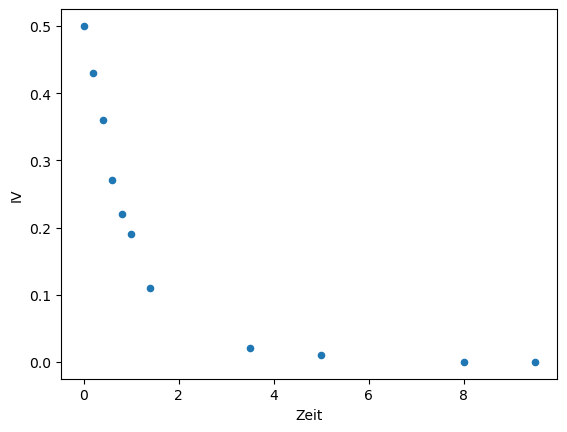

In [11]:
pk_iv.plot.scatter(x="Zeit", y="IV")
plt.show()

In [12]:
def iv_exp(t, k, C0):
    return C0 * np.exp(-k * t)

In [13]:
import numpy as np
from scipy.optimize import curve_fit

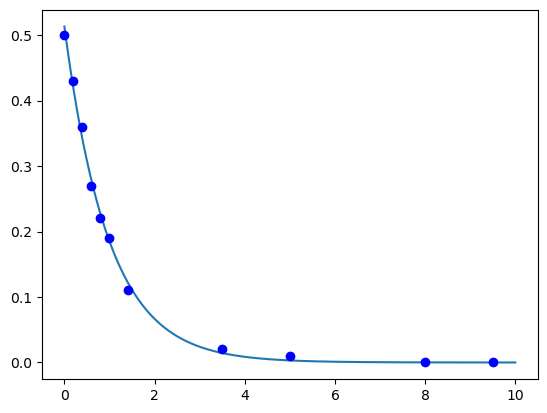

In [14]:
popt, pcov = curve_fit(iv_exp, zeit, iv)
xx = np.linspace(0, 10, 1000)
fit_val = iv_exp(xx, *popt)

plt.plot(xx, fit_val)
plt.plot(zeit, iv, 'bo')

In [15]:
po = [0, 0.09, 0.15, 0.19,
      0.23, 0.24, 0.26, 0.15, 
      0.07, 0.04, 0.01]
pk_iv_po = pd.DataFrame({'Zeit': zeit, 'IV': iv, 'PO': po})
print(pk_iv_po)

    Zeit    IV    PO
0    0.0  0.50  0.00
1    0.2  0.43  0.09
2    0.4  0.36  0.15
3    0.6  0.27  0.19
4    0.8  0.22  0.23
5    1.0  0.19  0.24
6    1.4  0.11  0.26
7    3.5  0.02  0.15
8    5.0  0.01  0.07
9    8.0  0.00  0.04
10   9.5  0.00  0.01


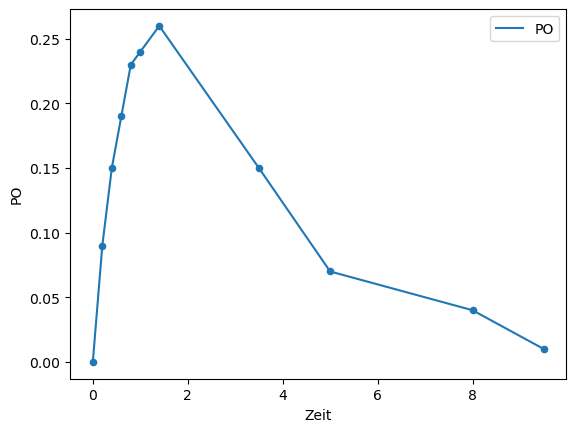

In [16]:
ax = pk_iv_po.plot.scatter(x="Zeit", y="PO")
pk_iv_po.plot.line(x="Zeit", y="PO", ax=ax)
plt.show()

## Aufgabe 3: Studie

In [17]:
gruppe = ['K', 'K', 'K', 'K', 'V1', 'V1', 'V1', 'V1', 'V2', 'V2', 'V2', 'V2']
vor = [8, 9, 8, 7, 6, 8, 8, 7, 8, 9, 8, 7]
nach = [8, 8, 7, 8, 5, 6, 8, 8, 4, 5, 3, 4]

In [18]:
studie = pd.DataFrame({'Gruppe': gruppe, 'Vor': vor, 'Nach': nach})
print(studie)

   Gruppe  Vor  Nach
0       K    8     8
1       K    9     8
2       K    8     7
3       K    7     8
4      V1    6     5
5      V1    8     6
6      V1    8     8
7      V1    7     8
8      V2    8     4
9      V2    9     5
10     V2    8     3
11     V2    7     4


In [19]:
studie['Unterschied'] = studie['Nach'] - studie['Vor']
print(studie)

   Gruppe  Vor  Nach  Unterschied
0       K    8     8            0
1       K    9     8           -1
2       K    8     7           -1
3       K    7     8            1
4      V1    6     5           -1
5      V1    8     6           -2
6      V1    8     8            0
7      V1    7     8            1
8      V2    8     4           -4
9      V2    9     5           -4
10     V2    8     3           -5
11     V2    7     4           -3


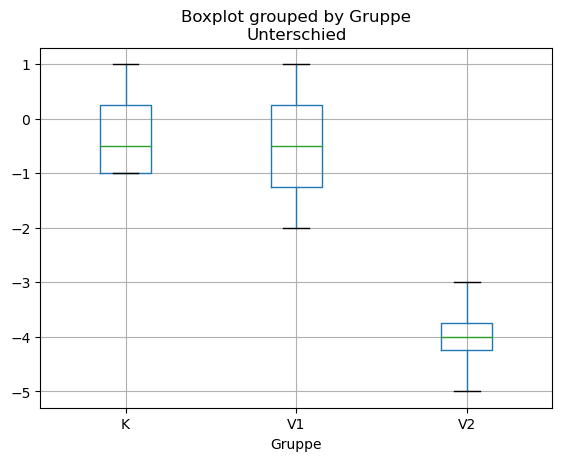

In [20]:
studie.boxplot(column='Unterschied', by='Gruppe')
plt.show()

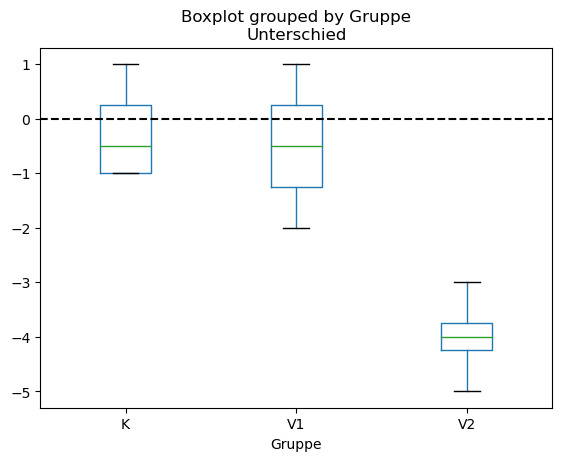

In [26]:
studie.boxplot(column='Unterschied', by='Gruppe', grid=False)
ax = plt.axhline(y=0, color='k', linestyle='--')
plt.show()

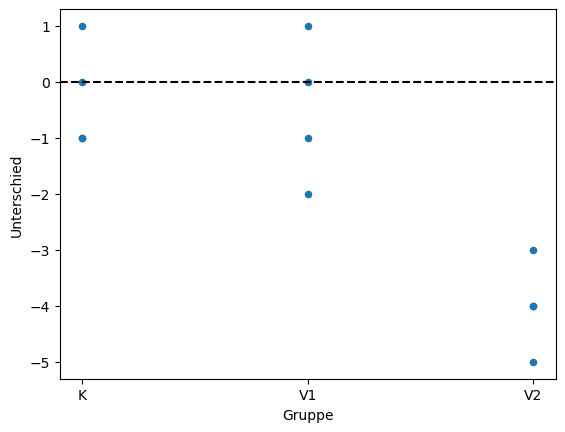

In [27]:
studie.plot.scatter('Gruppe', 'Unterschied')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()